<a href="https://colab.research.google.com/github/RatihParamita/dataMining/blob/main/JS%20-%20Data%20Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Baca file CSV dengan delimiter titik koma
df = pd.read_csv('/data_mahasiswa_dummy_1000.csv')

# 2. Hitung rata-rata IPK dari IP S1 sampai IP S8
ipk_cols = ['IP S1','IP S2','IP S3','IP S4','IP S5','IP S6','IP S7','IP S8']
df['rata_ipk'] = df[ipk_cols].mean(axis=1)

# 3. Hitung jumlah nilai A (nilai >= 85) dari lima mata kuliah awal
nilai_cols = ['Matematika','Fisika','Kimia','Bahasa Indonesia','Bahasa Inggris']
df['nilaiA'] = df[nilai_cols].apply(lambda row: sum(x >= 85 for x in row), axis=1)

# 4. Hitung jumlah data nilai (jumlah kolom yang terisi)
df['jumlah_data_nilai'] = df[nilai_cols].count(axis=1)

# 5. Ambil kolom penting
df_clean = df[['rata_ipk', 'nilaiA', 'jumlah_data_nilai']].copy()

# 6. Simpan hasil ke file CSV
df_clean.to_csv('mahasiswa_vector.csv', index=False)


In [6]:
from google.colab import files
files.download('mahasiswa_vector.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   rata_ipk  nilaiA  jumlah_data_nilai  cluster
0   2.71375       0                  5        2
1   3.24125       2                  5        1
2   2.99250       0                  5        2
3   3.12875       1                  5        1
4   2.93500       0                  5        2


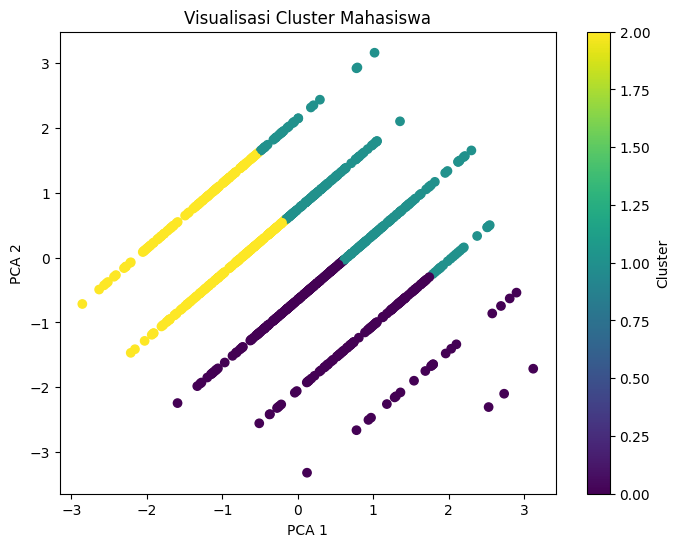

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Baca file hasil preprocessing
df = pd.read_csv('mahasiswa_vector.csv')

# 2. Lakukan normalisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Tentukan jumlah klaster
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 4. Lihat hasil cluster
print(df.head())

# 5. Simpan hasil ke file
df.to_csv('hasil_clustering_mahasiswa.csv', index=False)

# 6. Visualisasi (jika 2D cukup, misal pakai PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Visualisasi Cluster Mahasiswa')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [8]:
from google.colab import files
files.download('hasil_clustering_mahasiswa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>